In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
from sklearn.utils import shuffle
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1) or '1type' as

In [2]:
train_df = pd.read_csv('data1.csv')
valid_df = pd.read_csv('data2.csv')

In [3]:
train_df.head(5)

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN


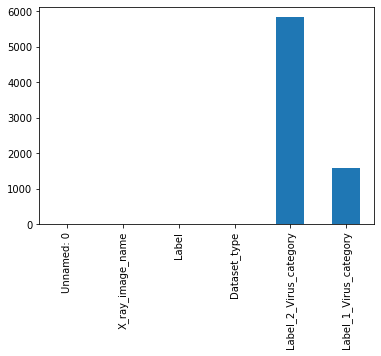

In [4]:
missing = train_df.isnull().sum()
missing.plot(kind='bar')

In [5]:
train_df.dropna(how = 'all')
train_df.isnull().sum()

Unnamed: 0                   0
X_ray_image_name             0
Label                        0
Dataset_type                 0
Label_2_Virus_category    5841
Label_1_Virus_category    1576
dtype: int64

In [6]:
train_data = train_df[train_df['Dataset_type'] == 'TRAIN']
test_data = train_df[train_df['Dataset_type'] == 'TEST']
assert train_data.shape[0] + test_data.shape[0] == train_df.shape[0]
print('train',train_data.shape)
print('test', test_data.shape)
test_data.sample(10)

train (5286, 6)
test (624, 6)


,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
5691,5714,person109_bacteria_513.jpeg,Pnemonia,TEST,NaN,bacteria
5854,5877,person175_bacteria_835.jpeg,Pnemonia,TEST,NaN,bacteria
5837,5860,person24_virus_58.jpeg,Pnemonia,TEST,NaN,Virus
5464,5487,NORMAL2-IM-0135-0001.jpeg,Normal,TEST,NaN,NaN
5606,5629,person136_bacteria_648.jpeg,Pnemonia,TEST,NaN,bacteria
5694,5717,person108_bacteria_507.jpeg,Pnemonia,TEST,NaN,bacteria
5354,5377,IM-0059-0001.jpeg,Normal,TEST,NaN,NaN
5457,5480,NORMAL2-IM-0173-0001-0001.jpeg,Normal,TEST,NaN,NaN
5292,5315,IM-0011-0001.jpeg,Normal,TEST,NaN,NaN
5693,5716,person108_bacteria_511.jpeg,Pnemonia,TEST,NaN,bacteria


In [7]:
train_fill = train_data.fillna('unknown')
test_fill = test_data.fillna('unknown')
display(train_fill.head(5))

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,unknown,unknown
1,1,IM-0127-0001.jpeg,Normal,TRAIN,unknown,unknown
2,2,IM-0125-0001.jpeg,Normal,TRAIN,unknown,unknown
3,3,IM-0122-0001.jpeg,Normal,TRAIN,unknown,unknown
4,4,IM-0119-0001.jpeg,Normal,TRAIN,unknown,unknown


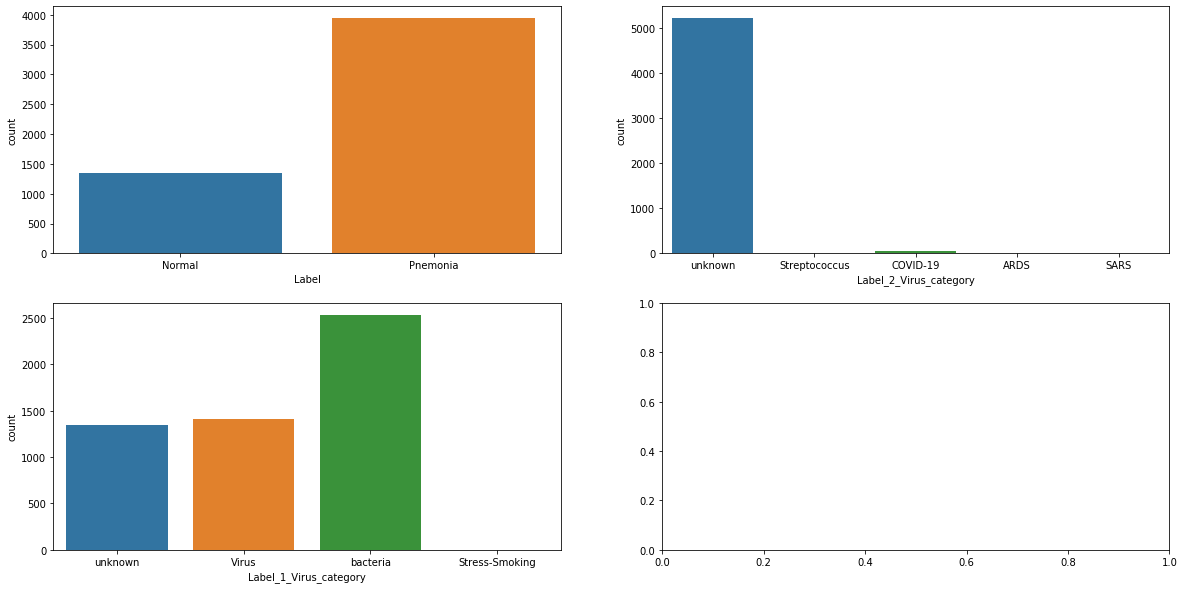

In [8]:
targets = ['Label', 'Label_2_Virus_category', 'Label_1_Virus_category']
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
sns.countplot(x=targets[0], data=train_fill, ax=ax[0, 0])
sns.countplot(x=targets[1], data=train_fill, ax=ax[0, 1])
sns.countplot(x=targets[2], data=train_fill, ax=ax[1, 0])
plt.show()

In [9]:
test_img_dir = 'images/test'
train_img_dir = 'images/train'
assert os.path.isdir(test_img_dir) == True
assert os.path.isdir(train_img_dir) == True
sample_train_images = list(os.walk(train_img_dir))[0][2][:8]
sample_train_images = list(map(lambda x: os.path.join(train_img_dir, x), sample_train_images))
sample_test_images = list(os.walk(test_img_dir))[0][2][:8]
sample_test_images = list(map(lambda x: os.path.join(test_img_dir, x), sample_test_images))

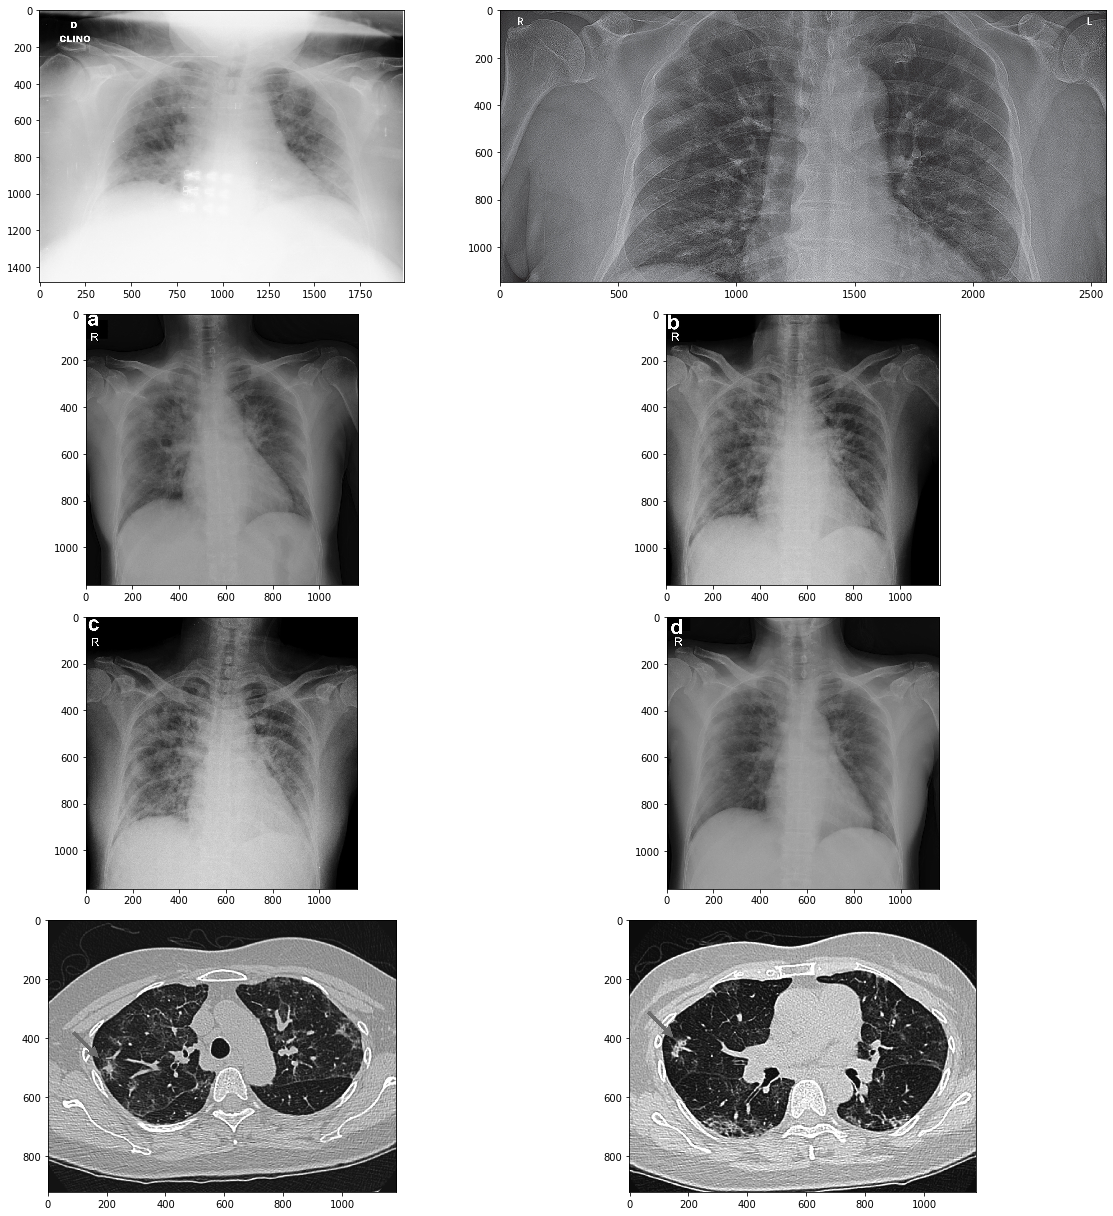

In [10]:
plt.figure(figsize = (17,17))
for i, f in enumerate(sample_train_images):
    image = Image.open(f)
    plt.subplot(4,2,i+1)
    plt.imshow(image)

plt.tight_layout()

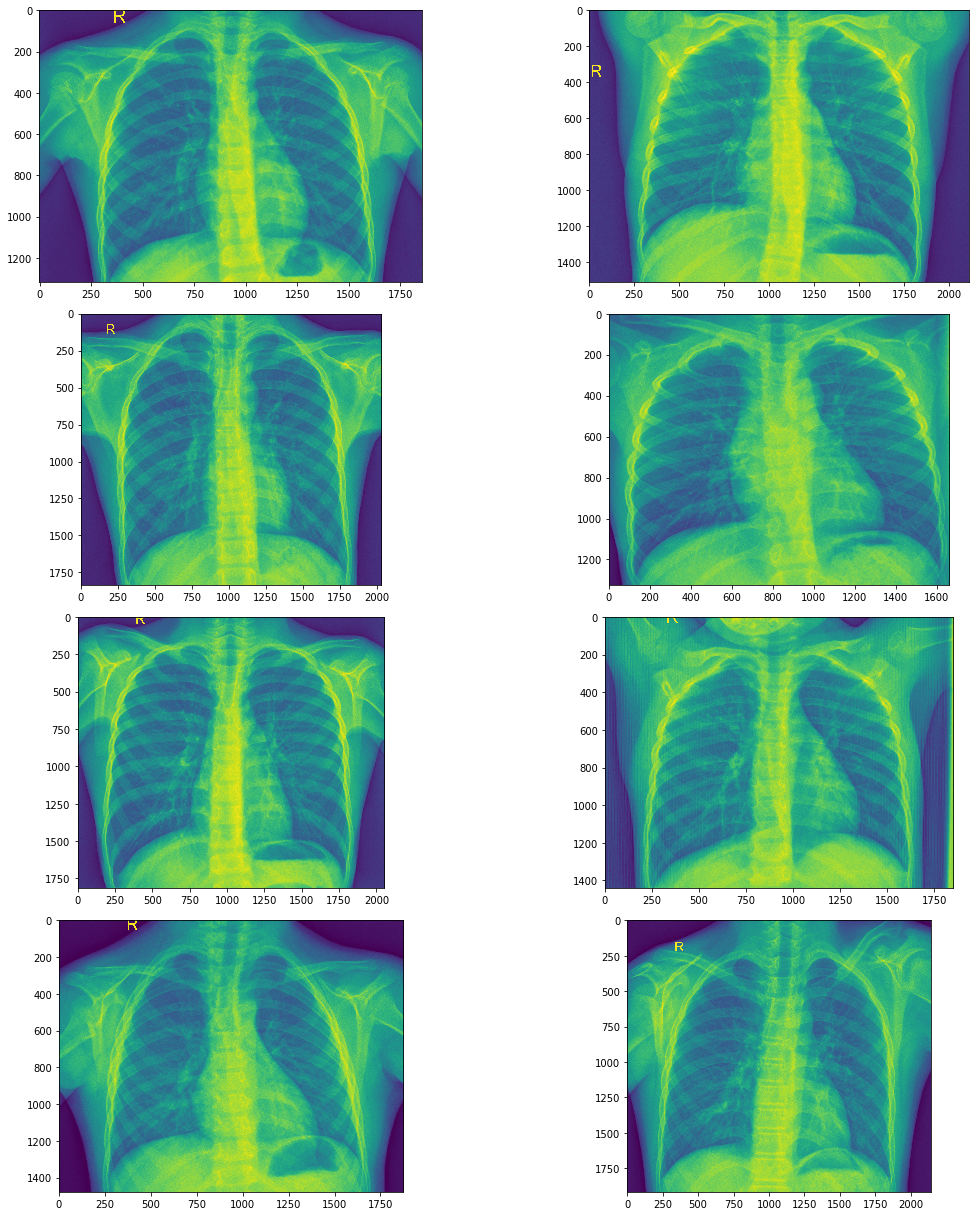

In [11]:
plt.figure(figsize = (17,17))
for i, f in enumerate(sample_test_images):
    image = Image.open(f)
    plt.subplot(4,2,i+1)
    plt.imshow(image)

plt.tight_layout()

In [12]:

final_train_data = train_data[(train_data['Label'] == 'Normal') | 
                              ((train_data['Label'] == 'Pnemonia') & (train_data['Label_2_Virus_category'] == 'COVID-19'))]

final_train_data['target'] = ['negative' if holder == 'Normal' else 'positive' for holder in final_train_data['Label']]

final_train_data = shuffle(final_train_data, random_state=1)

final_validation_data = final_train_data.iloc[1000:, :]
final_train_data = final_train_data.iloc[:1000, :]

print(f"Final train data shape : {final_train_data.shape}")
final_train_data.sample(10)

Final train data shape : (1000, 7)


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category,target
548,548,IM-0739-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
862,862,NORMAL2-IM-0700-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
1205,1205,NORMAL2-IM-1180-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
177,177,IM-0332-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
41,41,IM-0237-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
82,82,IM-0277-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
950,950,NORMAL2-IM-0887-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
833,833,NORMAL2-IM-0797-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
207,207,IM-0382-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
1216,1216,NORMAL2-IM-1256-0001.jpeg,Normal,TRAIN,NaN,NaN,negative


In [13]:
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=90,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    zoom_range=[0.9, 1.25],
    brightness_range=[0.5, 1.5]
)

test_image_generator = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_image_generator.flow_from_dataframe(
    dataframe=final_train_data,
    directory=train_img_dir,
    x_col='X_ray_image_name',
    y_col='target',
    target_size=(224, 224),
    batch_size=8,
    seed=2020,
    shuffle=True,
    class_mode='binary'
)

validation_generator = train_image_generator.flow_from_dataframe(
    dataframe=final_validation_data,
    directory=train_img_dir,
    x_col='X_ray_image_name',
    y_col='target',
    target_size=(224, 224),
    batch_size=8,
    seed=2020,
    shuffle=True,
    class_mode='binary'
)

test_generator = test_image_generator.flow_from_dataframe(
    dataframe=test_data,
    directory=test_img_dir,
    x_col='X_ray_image_name',
    target_size=(224, 224),
    shuffle=False,
    batch_size=16,
    class_mode=None
)

Found 1000 validated image filenames belonging to 2 classes.
Found 400 validated image filenames belonging to 2 classes.
Found 624 validated image filenames.
